... by Martina García Mejía

### Importar librerías, datos y demás

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

La lectura de datos se hace localmente y en el mismo directorio en el que se encuentra el notebook, con el nombre original del archivo.

In [2]:
data_raw = np.genfromtxt("datos-carro-1d.csv", delimiter=',', missing_values=np.nan, skip_header=5) # Importación de datos

data = data_raw[-(data_raw[:,1][data_raw[:,1]>0.004]).shape[0]:]# Nuevo array con datos filtrados
#   La condición de filtrado es que x > 0.004 (el movimiento inicie), 
#   luego se hace una nueva lista (array) de la cantidad n de números que cumplen esa función, 
#   seleccionando de último a primero en la lista original [-n:], pues el carro no desacelera al final.

t, x, v, a = data[:,0], data[:,1], data[:,3], data[:,5]     # Por simplicidad

print(f"Inicio del movimiento: {data[0:1,0][0]:.3f}s")

Inicio del movimiento: 1.133s


### Empieza lo chévere
Comencemos haciendo algunas definiciones:

In [3]:
def central(t,val):
    v[1:-1] = (val[2:] - val[:-2])/(t[2:] - t[:-2])
    return v

def linfit(t,vo,a):
    return vo+a*t

def quadfit(t,xo,vo,a):
    return xo+vo*t+a*(t**2)/2

#### Velocidad
Ahora hagamos la derivada central y el ajuste:

In [4]:
v_calc = central(t,x)   # Cálculo de velocidad por derivada central
vc_param, vc_coparam = curve_fit(linfit, t[1:-1], v_calc[1:-1])   # Cálculo de parámetros del ajuste
vc_err = np.sqrt(np.diag(vc_coparam))   # Errores estándar

print(f"Los parámetros vo y a son {vc_param[0]:.4f} y {vc_param[1]:.4f}.")
print(f"La desviación estándar para los valores de vo y a son {vc_err[0]:.4f} y {vc_err[1]:.4f}.")

Los parámetros vo y a son -0.7016 y 0.7093.
La desviación estándar para los valores de vo y a son 0.0063 y 0.0031.


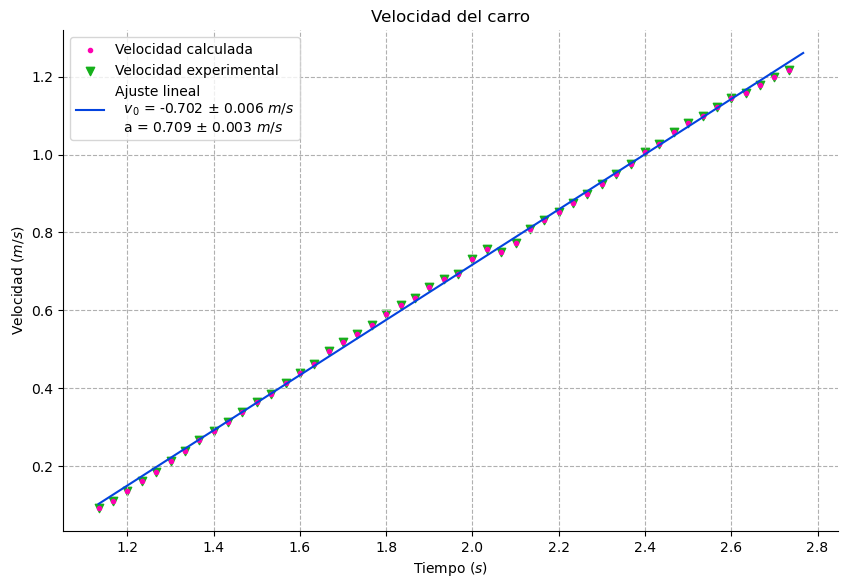

In [5]:
plt.figure(figsize=(10,6.5))
plt.scatter(t, v_calc, color="xkcd:bright pink", marker='.', label="Velocidad calculada", zorder=2)
plt.scatter(t, v, color="xkcd:green", marker='v', label="Velocidad experimental", zorder=1)
plt.plot(t, linfit(t, *vc_param), color="xkcd:blue", 
         label=f"Ajuste lineal\n  $v_{0}$ = {vc_param[0]:.3f} $\pm$ {vc_err[0]:.3f} $m/s$\n  a = {vc_param[1]:.3f} $\pm$ {vc_err[1]:.3f} $m/s$")
plt.xlabel("Tiempo $(s)$")
plt.ylabel("Velocidad $(m/s)$")
plt.title("Velocidad del carro")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.legend()
plt.show()

Este algoritmo de derivada central es, de hecho, el mismo que usa Tracker por defecto.

#### Aceleración
Promediando datos, haciendo ajustes y calculando errores

In [6]:
aex_prom = np.nanmean(a)  # Promedio de datos experimentales
aex_err = np.nanstd(a)    # Desviación estándar

a_param, a_coparam = curve_fit(quadfit, t, x)   # Cálculo de parámetros del ajuste
a_err = np.sqrt(np.diag(a_coparam))   # Errores estándar

print(f"La aceleración promedio a partir de los datos experimentales es {aex_prom:.4f} +- {aex_err:.4f} m/s^2\n")

print(f"Los parámetros xo, vo y a son {a_param[0]:.4f}, {a_param[1]:.4f} y {a_param[2]:.4f}.")
print(f"La desviación estándar para los valores de xo, vo y a son {a_err[0]:.4f}, {a_err[1]:.4f} y {a_err[2]:.4f}.")

La aceleración promedio a partir de los datos experimentales es 0.7079 +- 0.1179 m/s^2

Los parámetros xo, vo y a son 0.3352, -0.6935 y 0.7064.
La desviación estándar para los valores de xo, vo y a son 0.0029, 0.0031 y 0.0016.


Graficando el asunto:

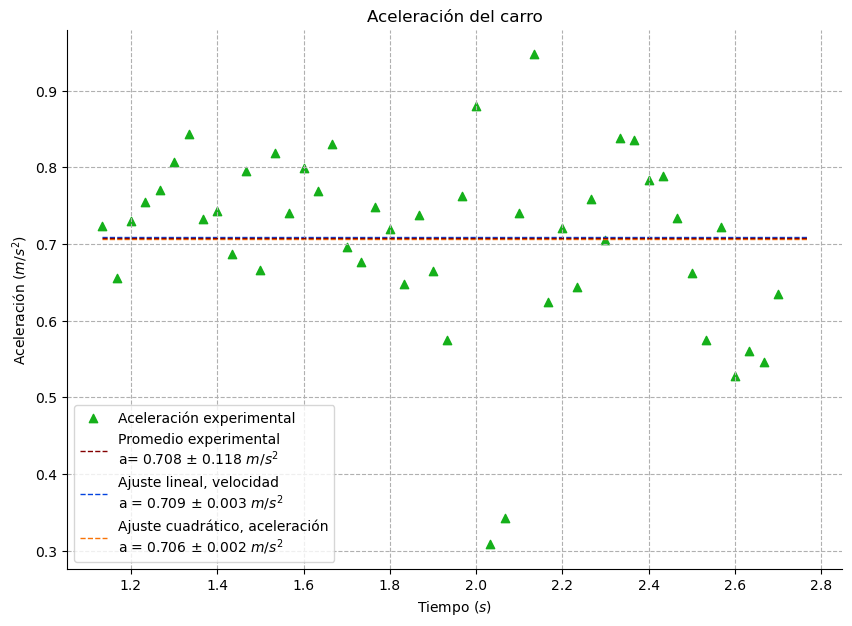

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(t, a, color="xkcd:green", marker='^', label="Aceleración experimental", zorder=0)
plt.plot([min(t), max(t)], [aex_prom, aex_prom], color="xkcd:dark red", linestyle="--", zorder=2, 
         label=f"Promedio experimental\na= {aex_prom:.3f} $\pm$ {aex_err:.3f} $m/s^{2}$", linewidth=1)
plt.plot([min(t), max(t)], [vc_param[1], vc_param[1]], color="xkcd:blue", linestyle="--", zorder=1, 
         label=f"Ajuste lineal, velocidad\na = {vc_param[1]:.3f} $\pm$ {vc_err[1]:.3f} $m/s^{2}$", linewidth=1)
plt.plot([min(t), max(t)], [a_param[2], a_param[2]], color="xkcd:orange", linestyle="--", zorder=1, 
         label=f"Ajuste cuadrático, aceleración\na = {a_param[2]:.3f} $\pm$ {a_err[2]:.3f} $m/s^{2}$", linewidth=1)
plt.xlabel("Tiempo $(s)$")
plt.ylabel("Aceleración $(m/s^{2})$")
plt.title("Aceleración del carro")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.legend(loc="lower left")
plt.show()